In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from src.deeptendies.stock_data import StockData



In [22]:
test_data = StockData('AAPL', days=365)

test_data.df

,c,h,l,o,s,t,v,wma
0,64.8575,67.9250,64.7500,67.7000,ok,2020-04-07 00:00:00,50721831,0.000000
1,66.5175,66.8425,65.3075,65.6850,ok,2020-04-08 00:00:00,42223821,0.000000
2,66.9975,67.5175,66.1750,67.1750,ok,2020-04-09 00:00:00,40529123,66.480833
3,68.3125,68.4250,66.4575,67.0775,ok,2020-04-13 00:00:00,32755731,67.575000
4,71.7625,72.0625,69.5125,70.0000,ok,2020-04-14 00:00:00,48748672,69.818333
...,...,...,...,...,...,...,...,...
247,122.1500,123.5200,121.1500,121.6500,ok,2021-03-31 00:00:00,118323826,121.273333
248,123.0000,124.1800,122.4900,123.6600,ok,2021-04-01 00:00:00,75089134,122.200000
249,125.9000,126.1601,123.0700,123.8700,ok,2021-04-05 00:00:00,88651175,124.308333
250,126.2100,127.1300,125.6500,126.5000,ok,2021-04-06 00:00:00,79463200,125.571667


In [19]:
test_data.df.columns

Index(['c', 'h', 'l', 'o', 's', 't', 'v', 'wma'], dtype='object')

In [26]:
time_series = test_data.df.drop(['h', 'l', 'o', 's', 'v', 'wma'], axis='columns')
print(time_series)

            c                   t
0     64.8575 2020-04-07 00:00:00
1     66.5175 2020-04-08 00:00:00
2     66.9975 2020-04-09 00:00:00
3     68.3125 2020-04-13 00:00:00
4     71.7625 2020-04-14 00:00:00
..        ...                 ...
247  122.1500 2021-03-31 00:00:00
248  123.0000 2021-04-01 00:00:00
249  125.9000 2021-04-05 00:00:00
250  126.2100 2021-04-06 00:00:00
251  127.9000 2021-04-07 13:30:00

[252 rows x 2 columns]


In [27]:
time_series.dtypes

c           float64
t    datetime64[ns]
dtype: object

In [28]:
time_series = time_series.set_index('t')

In [29]:
time_series

,c
t,
2020-04-07 00:00:00,64.8575
2020-04-08 00:00:00,66.5175
2020-04-09 00:00:00,66.9975
2020-04-13 00:00:00,68.3125
2020-04-14 00:00:00,71.7625
...,...
2021-03-31 00:00:00,122.1500
2021-04-01 00:00:00,123.0000
2021-04-05 00:00:00,125.9000


In [37]:
y = time_series['c'].resample('D').fillna('ffill')

In [38]:
y

t
2020-04-07     64.8575
2020-04-08     66.5175
2020-04-09     66.9975
2020-04-10     66.9975
2020-04-11     66.9975
                ...   
2021-04-03    123.0000
2021-04-04    123.0000
2021-04-05    125.9000
2021-04-06    126.2100
2021-04-07    126.2100
Freq: D, Name: c, Length: 366, dtype: float64

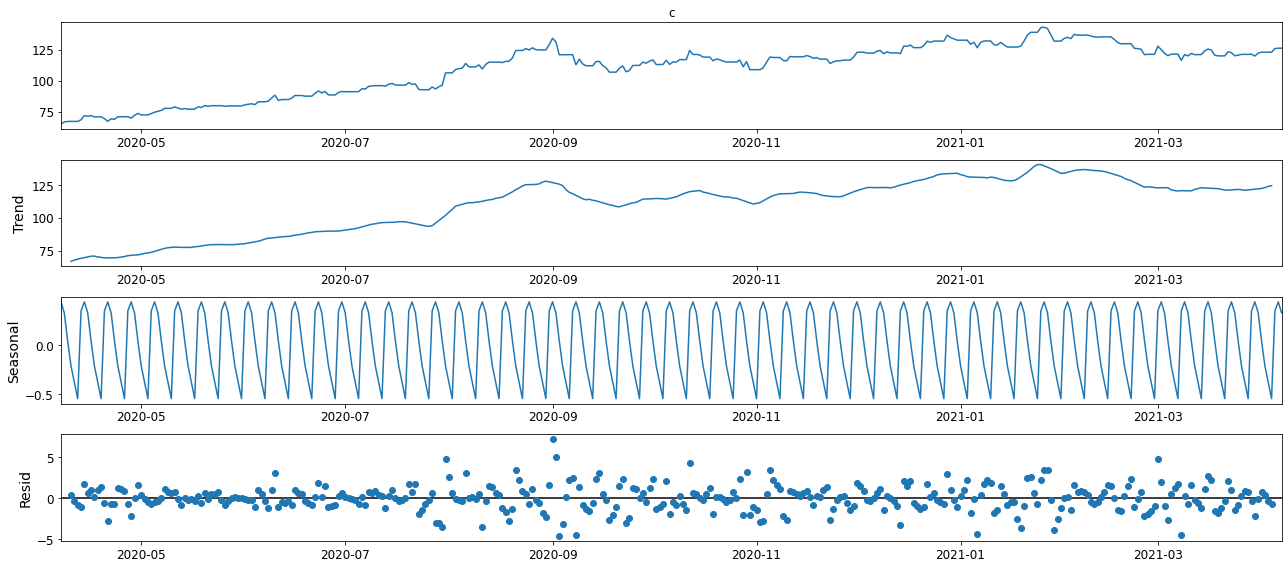

In [49]:
import matplotlib
import statsmodels.api as sm

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

In [50]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [51]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4480.09525265698
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3923.200000998214
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2344.4579618330554
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2277.4237900431726
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2337.208488657603
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2332.498194878058
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2283.125736351284
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2247.262122727599
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3980.312465097106
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3449.294295618416
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2059.5074586697474
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1995.5709807183102
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2062.4716882319126
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2042.9067756132415
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2005.747757839742
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1996.3221751416702
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1578.4854619513933
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1536.4445631230099
AR

In [54]:
mod = sm.tsa.statespace.SARIMAX(y,
                              
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3877      0.449      0.864      0.388      -0.492       1.268
ma.L1         -0.4708      0.430     -1.094      0.274      -1.314       0.373
ar.S.L12      -0.5419      0.041    -13.249      0.000      -0.622      -0.462
sigma2         6.5393      0.364     17.988      0.000       5.827       7.252


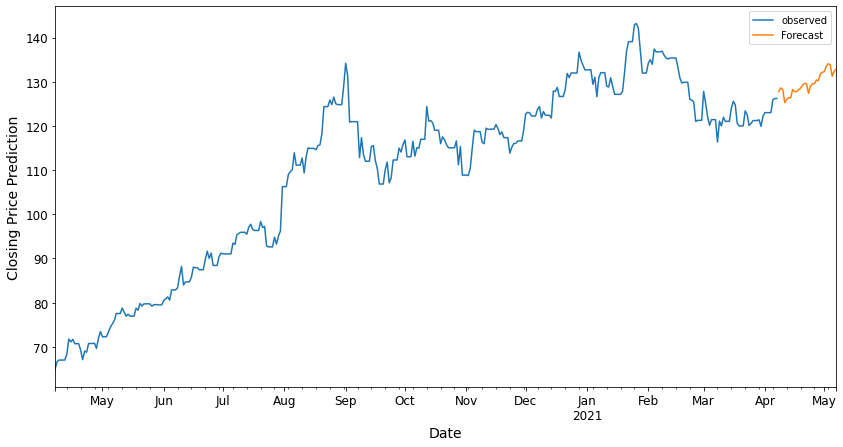

In [61]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int(alpha=0.95)

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.05)

ax.set_xlabel('Date')
ax.set_ylabel('Closing Price Prediction')

plt.legend()
plt.show()

In [48]:
# Plotly version

import plotly.express as px

fig = px.line(x=y.index, y=y.values, title="Closing Price Prediction", labels=dict(x="Date", y="Closing Price", color="Place"))
fig.add_scatter(x=pred_ci.index, y=pred_ci['lower c'])
fig.update_layout(showlegend=False)
fig.show()